Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the dataset:

In [3]:
file_path = r'C:\Users\Ibrah\OneDrive\Desktop\isolation-forest-tool\data\creditcard.csv'
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")


Dataset loaded successfully.


Understand the Dataset

    Basic Information:

In [4]:
data.info()
data.describe()
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Check for missing values:

In [5]:
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Dataset Shape:

In [6]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")


Number of rows: 284807
Number of columns: 31


Column Types: Identify categorical and numerical columns.

Analyze the Class Distribution

    Class imbalance (important for fraud detection):

Class
0    284315
1       492
Name: count, dtype: int64


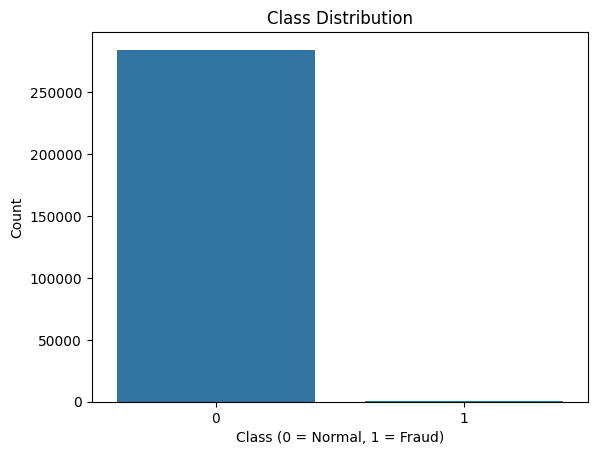

In [7]:
class_counts = data['Class'].value_counts()
print(class_counts)
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


Visualize Numerical Features

    Histograms: Plot the distribution of features like Amount and Time.

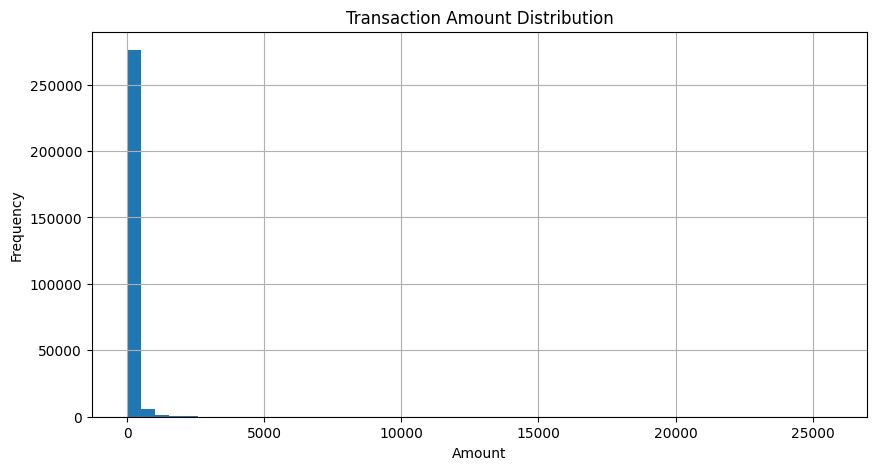

In [8]:
data['Amount'].hist(bins=50, figsize=(10, 5))
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


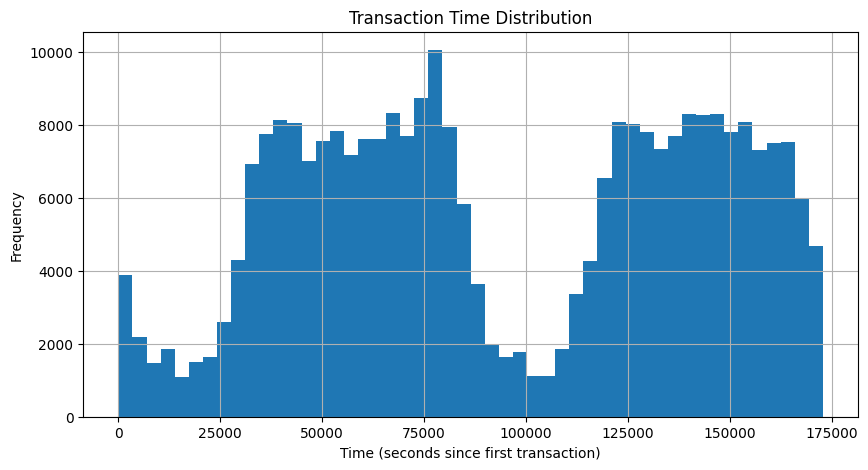

In [9]:
data['Time'].hist(bins=50, figsize=(10, 5))
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()


Correlation Matrix: Visualize correlations among features.

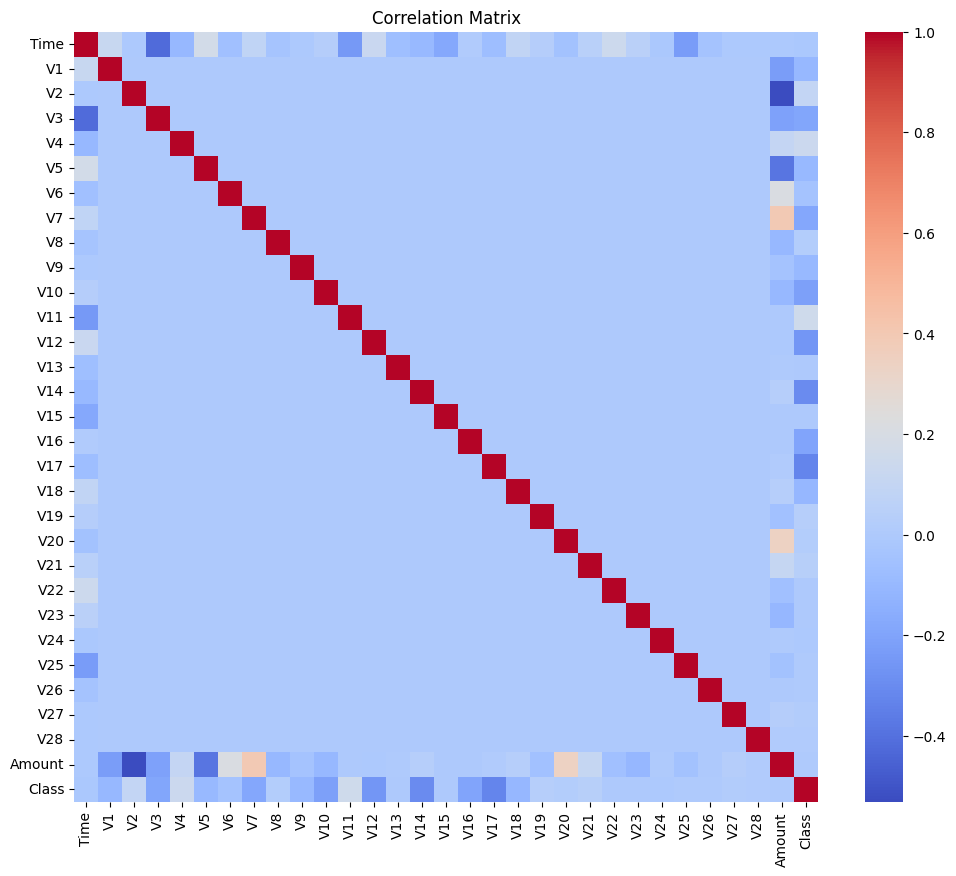

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


Analyze Fraud vs. Non-Fraud Transactions

    Compare distributions for fraud (Class = 1) and non-fraud (Class = 0).

In [11]:
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

print("Fraud Transactions:")
print(fraud_data.describe())

print("Non-Fraud Transactions:")
print(non_fraud_data.describe())


Fraud Transactions:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -43.

Plot Amount distributions:

C:\Users\Ibrah\AppData\Local\Temp\ipykernel_18368\739122353.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data['Amount'], label='Fraud', shade=True, color='red')
C:\Users\Ibrah\AppData\Local\Temp\ipykernel_18368\739122353.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data['Amount'], label='Non-Fraud', shade=True, color='blue')


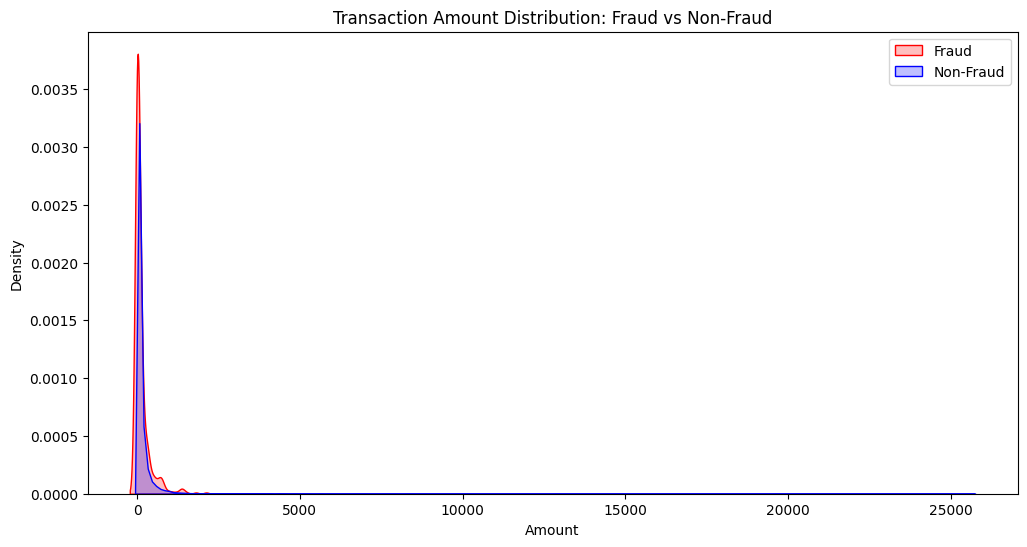

In [12]:
plt.figure(figsize=(12, 6))
sns.kdeplot(fraud_data['Amount'], label='Fraud', shade=True, color='red')
sns.kdeplot(non_fraud_data['Amount'], label='Non-Fraud', shade=True, color='blue')
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.legend()
plt.show()


 Check for Outliers

    Identify potential outliers in Amount and other features:

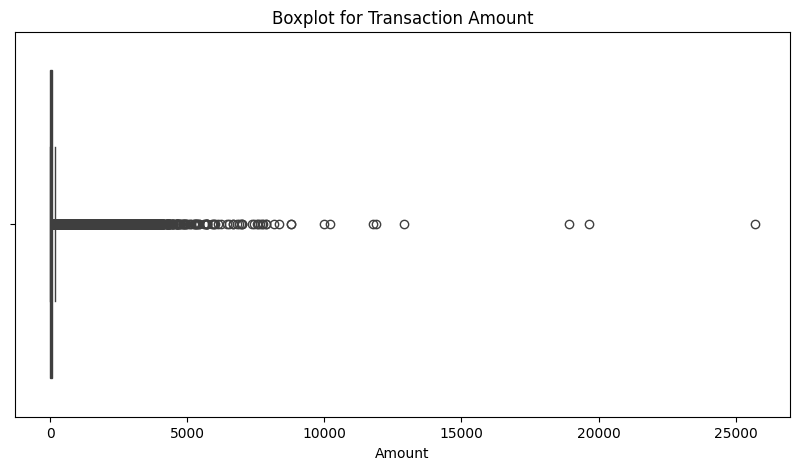

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Amount'])
plt.title("Boxplot for Transaction Amount")
plt.show()


Feature Relationships

    Pairplot for selected features:

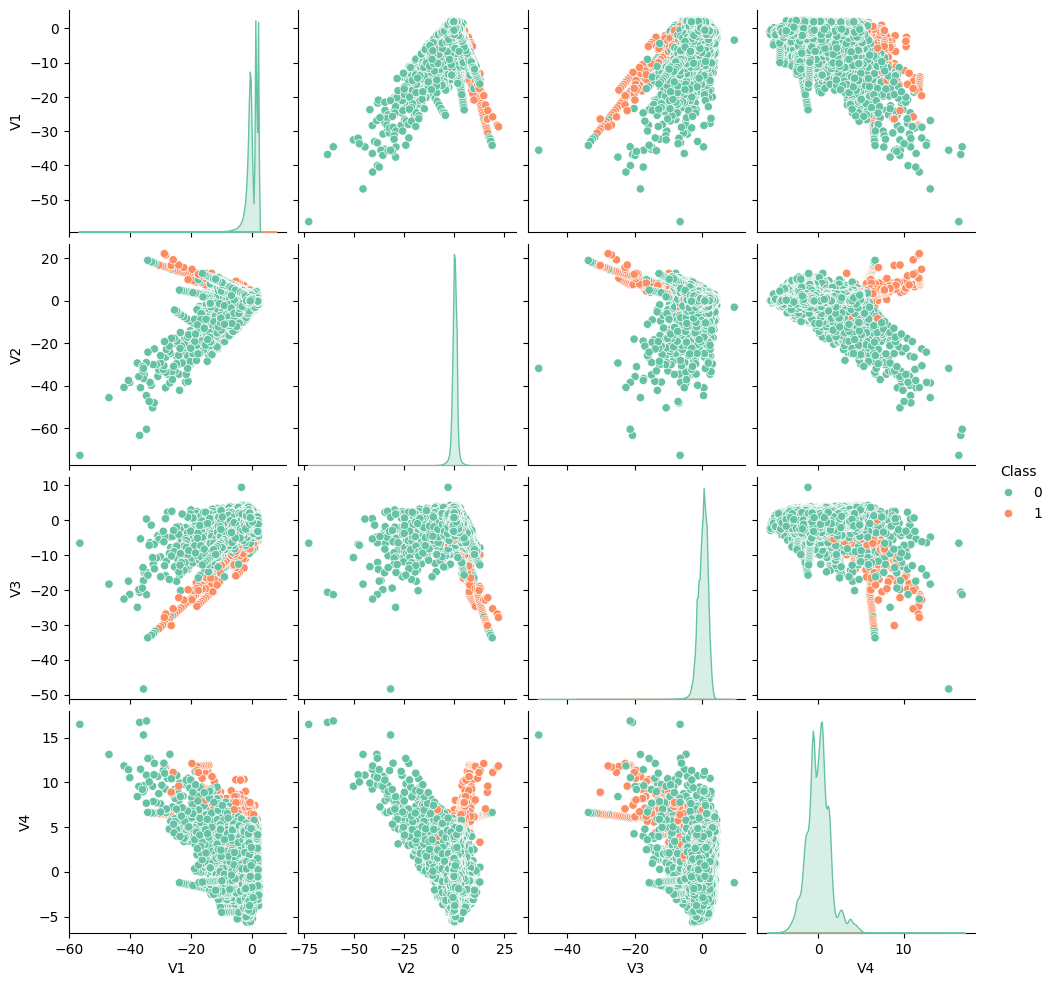

In [15]:
selected_features = ['V1', 'V2', 'V3', 'V4', 'Class']
sns.pairplot(data[selected_features], hue='Class', diag_kind='kde', palette='Set2')
plt.show()


Scatter plot for Time vs. Amount:

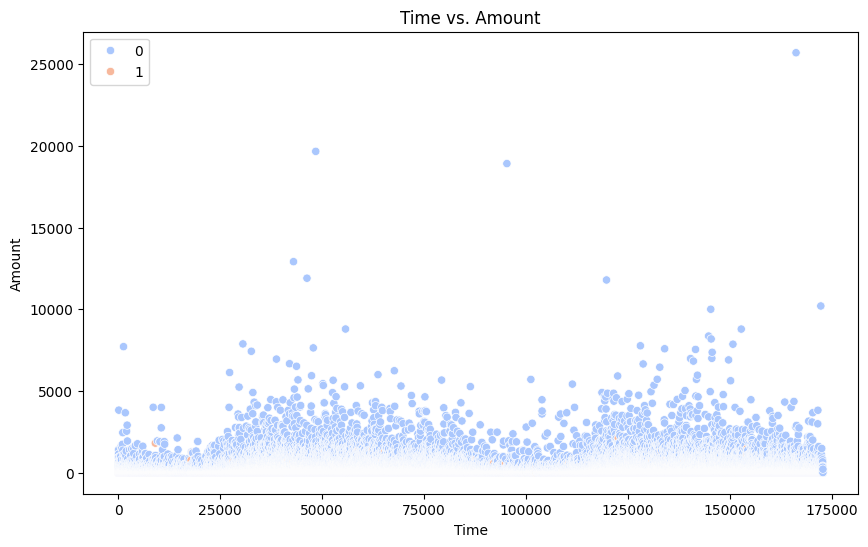

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, palette='coolwarm')
plt.title("Time vs. Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.show()


Insights and Observations

    Summarize findings:
        Are there significant differences in Amount or Time for fraud vs. non-fraud transactions?
        Are there any correlations between features?
        Is the class imbalance severe?

Prepare for Modeling

    Normalize Amount and drop unnecessary columns (e.g., Time).
    Save preprocessed data:

In [17]:
preprocessed_file_path = r'C:\Users\Ibrah\OneDrive\Desktop\isolation-forest-tool\data\processed_creditcard.csv'
data.to_csv(preprocessed_file_path, index=False)
print(f"Preprocessed data saved to {preprocessed_file_path}")


Preprocessed data saved to C:\Users\Ibrah\OneDrive\Desktop\isolation-forest-tool\data\processed_creditcard.csv
